In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis


<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

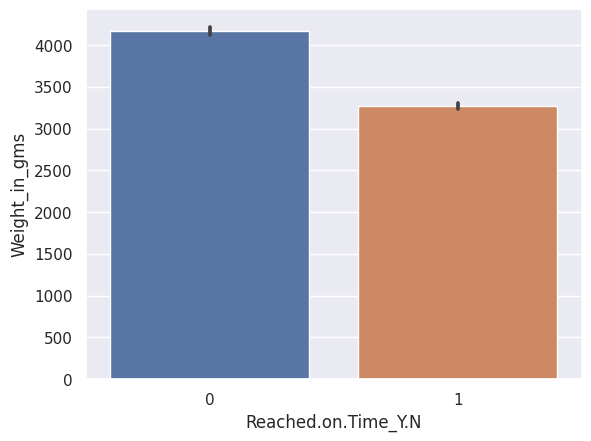

In [ ]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Weight_in_gms")
#Heavy weight items are most likely to be late than light weight items

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

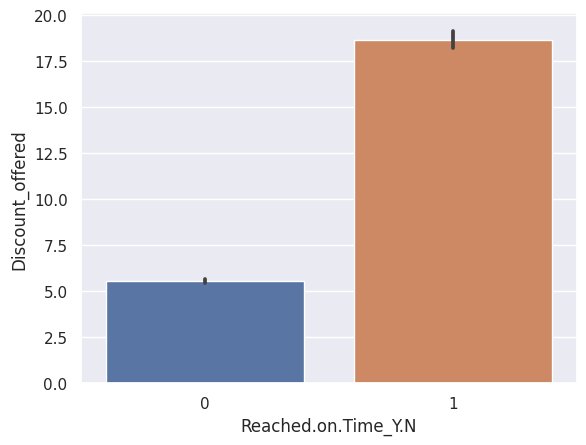

In [ ]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Discount_offered")
#Because the huge discount offered are ontime, we have to make campaign to give more discount on product

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

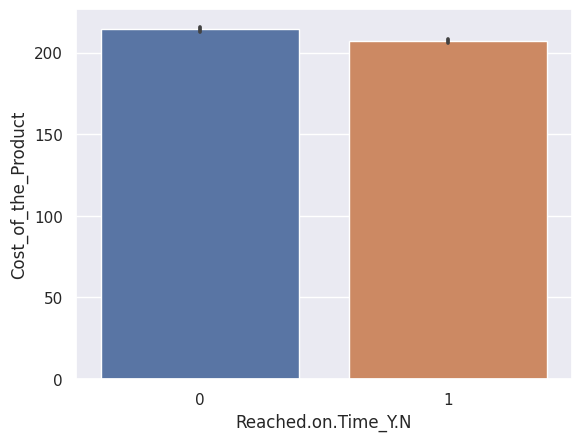

In [ ]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Cost_of_the_Product")

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

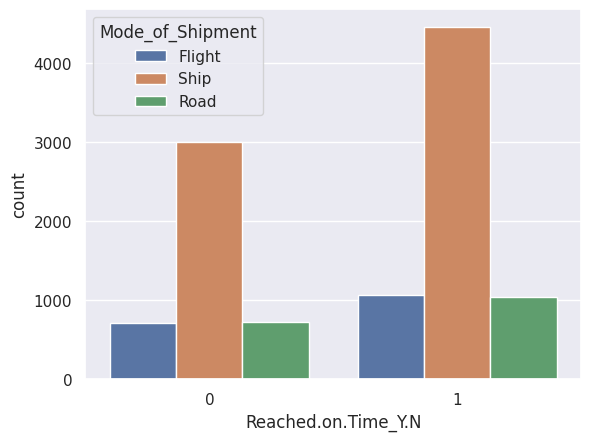

In [ ]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Mode_of_Shipment")

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

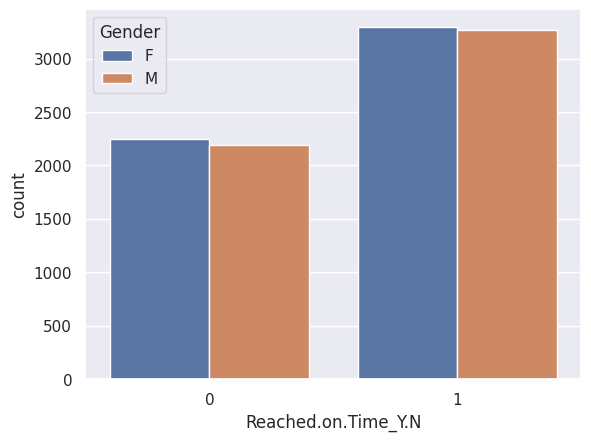

In [ ]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Gender")

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

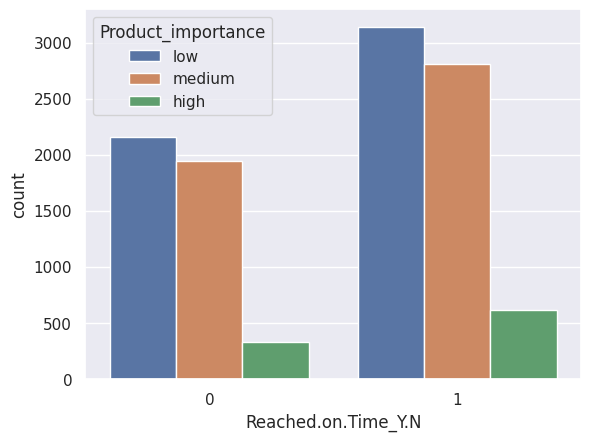

In [ ]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Product_importance")

# Data Preprocessing


In [ ]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [ ]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [ ]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Warehouse_block']= label_encoder.fit_transform(df['Warehouse_block'])
df['Warehouse_block'].unique()

array([3, 4, 0, 1, 2])

In [ ]:
df['Mode_of_Shipment']= label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Mode_of_Shipment'].unique()

array([0, 2, 1])

In [ ]:
df['Product_importance']= label_encoder.fit_transform(df['Product_importance'])
df['Product_importance'].unique()

array([1, 2, 0])

In [ ]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [ ]:
#convert object data types column to integer
df['Warehouse_block'] = pd.to_numeric(df['Warehouse_block'])
df['Mode_of_Shipment'] = pd.to_numeric(df['Mode_of_Shipment'])
df['Product_importance'] = pd.to_numeric(df['Product_importance'])
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

# Check the Outliers


<Axes: xlabel='Cost_of_the_Product'>

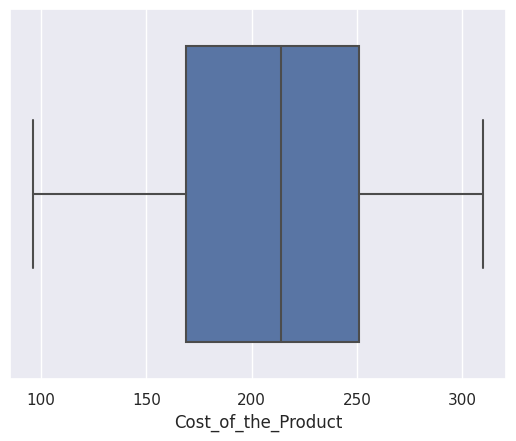

In [ ]:
sns.boxplot(x=df["Cost_of_the_Product"])

<Axes: xlabel='Discount_offered'>

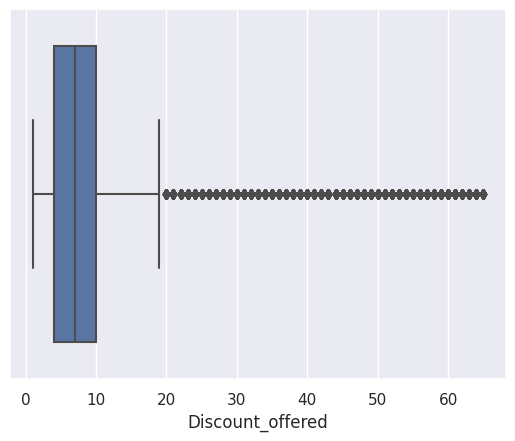

In [ ]:
sns.boxplot(x=df["Discount_offered"])

<Axes: xlabel='Weight_in_gms'>

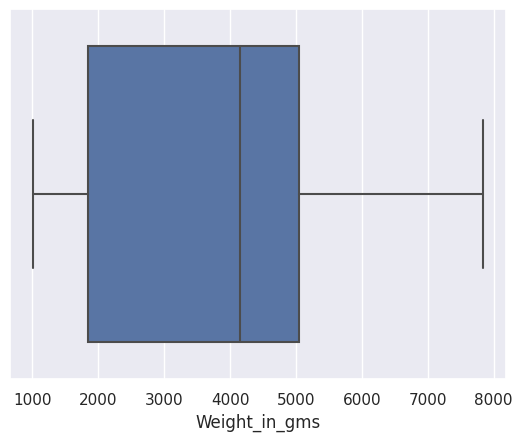

In [ ]:
sns.boxplot(x=df["Weight_in_gms"])

In [ ]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


# Delete the Outlier Using Z-Score


In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)]
data_clean.shape

(10642, 12)

# Balance the Class Value


1    6282
0    4360
Name: Reached.on.Time_Y.N, dtype: int64

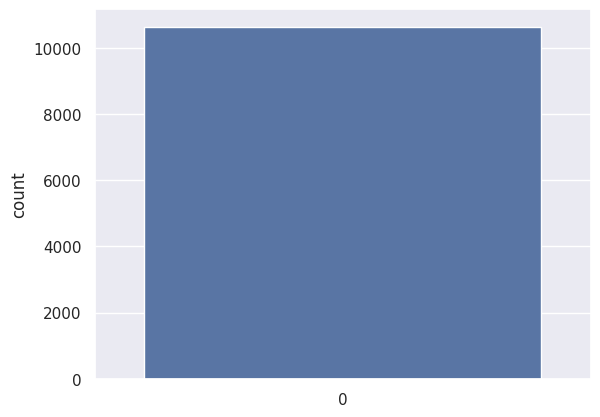

In [ ]:
#Counting 1 and 0 Value in stroke column
sns.countplot(data_clean['Reached.on.Time_Y.N'])
data_clean['Reached.on.Time_Y.N'].value_counts()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = data_clean[(data_clean['Reached.on.Time_Y.N']==1)]
df_minority = data_clean[(data_clean['Reached.on.Time_Y.N']==0)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 6282, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    6282
1    6282
Name: Reached.on.Time_Y.N, dtype: int64

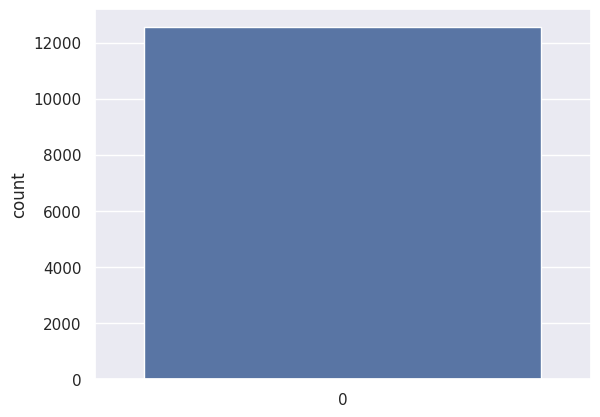

In [ ]:
sns.countplot(df_upsampled['Reached.on.Time_Y.N'])
df_upsampled['Reached.on.Time_Y.N'].value_counts()

<Axes: >

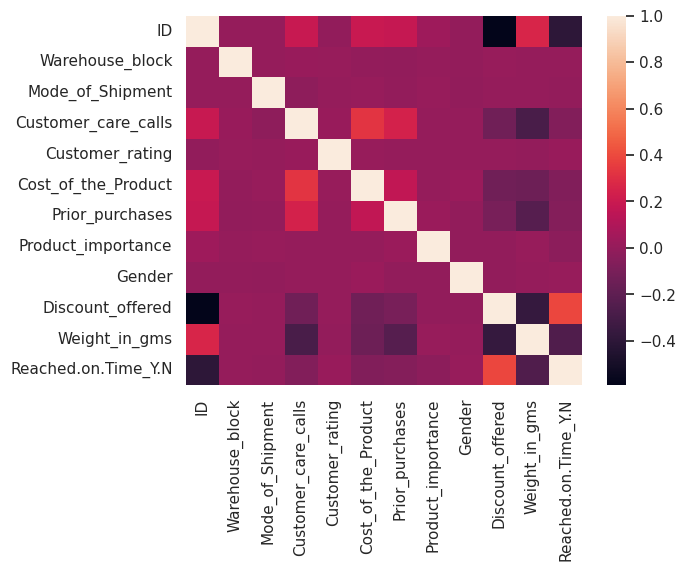

In [ ]:
sns.heatmap(data_clean.corr(), fmt='.2g')

# Machine Learning Model Building


In [ ]:
X = df_upsampled.drop('Reached.on.Time_Y.N', axis=1)
y = df_upsampled['Reached.on.Time_Y.N']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision  Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.64 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7717303005686433
Precision Score :  0.818260120585702
Recall Score :  0.7302075326671791


# Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 74.81 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7097661623108666
Precision Score :  0.8795454545454545
Recall Score :  0.5949269792467333


# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 68.52 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6379862700228833
Precision Score :  0.7884615384615384
Recall Score :  0.5357417371252883


In [ ]:
!pip install joblib


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Your code for splitting the data and training the Decision Tree Classifier
X = df_upsampled.drop('Reached.on.Time_Y.N', axis=1)
y = df_upsampled['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Save the best model (Decision Tree Classifier)
joblib.dump(dtree, 'best_model_decision_tree.pkl')


['best_model_decision_tree.pkl']

In [ ]:
loaded_model = joblib.load('best_model_decision_tree.pkl')
# Use the loaded_model for predictions or evaluation
